In [1]:
import torch
import torchvision
import h5py    
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
import os
print(os.getcwd())


/home/onyxia/work/codalab_tokam2d


Found annotations for 30 frames in 2 files.


Loaded 30 frames.
Nombre d'images : 30


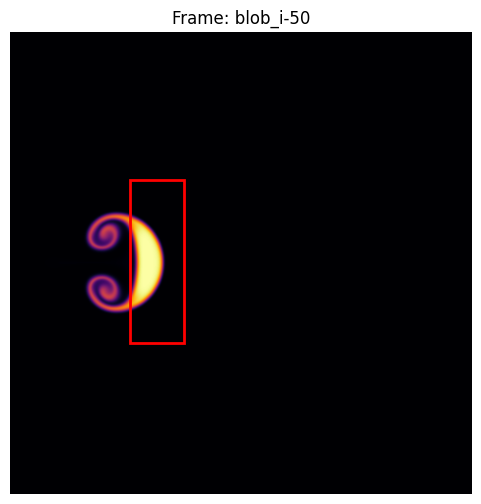

In [7]:
from pathlib import Path
from ingestion_program.tokam2d_utils import TokamDataset

# Charger le dataset TRAIN
data_dir = Path("dev_phase/input_data/train/")
dataset = TokamDataset(data_dir)

print(f"Nombre d'images : {len(dataset)}")

# Fonction d'affichage
def show_sample(dataset, idx):
    image, target = dataset[idx]

    # image: (1, H, W)
    img = image[0].numpy()

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img, cmap="inferno", origin="upper")

    boxes = target["boxes"]
    frame_index = target["frame_index"]

    if boxes is not None:
        for box in boxes:
            xmin, ymin, xmax, ymax = box.tolist()
            rect = patches.Rectangle(
                (xmin, ymin),
                xmax - xmin,
                ymax - ymin,
                linewidth=2,
                edgecolor="red",
                facecolor="none",
            )
            ax.add_patch(rect)

    ax.set_title(f"Frame: {frame_index}")
    ax.axis("off")
    plt.show()


# Visualiser quelques exemples
for i in range(1):
    show_sample(dataset, i)


In [11]:
for data in dataset:
    img, annot = data
    print(annot)

{'boxes': BoundingBoxes([[132.7600, 163.1900, 192.3200, 344.4200]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512), clamping_mode=soft), 'labels': tensor([1]), 'frame_index': 'blob_i-50'}
{'boxes': BoundingBoxes([[227.8300, 191.7000, 262.0300, 314.6300]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512), clamping_mode=soft), 'labels': tensor([1]), 'frame_index': 'blob_i-100'}
{'boxes': BoundingBoxes([[318.7500, 194.2300, 351.7200, 312.1000]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512), clamping_mode=soft), 'labels': tensor([1]), 'frame_index': 'blob_i-150'}
{'boxes': BoundingBoxes([[381.4900, 192.0200, 409.3800, 262.9900],
               [390.0600, 251.5900, 406.5300, 314.9500]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512), clamping_mode=soft), 'labels': tensor([1, 1]), 'frame_index': 'blob_i-200'}
{'boxes': BoundingBoxes([[128.0000, 252.2100, 210.4000, 373.9000],
               [440.7600, 181.5600, 459.7600, 248.7200],
               [441.3900, 262.040